Datasets te vinden op: https://ourworldindata.org/

Opdracht:
Formuleer een antwoord op de volgende vraag in je rapport.

- Welke landen boeken de grootste vooruitgang in het terugdringen van de CO2-uitstoot?

- Grootste vooruitgang in het terugdringen van de CO2-uitstoot:

U moet de relatieve CO2-output voor elk land vinden om dit te kunnen berekenen. Maar landen kunnen ook een groeiende en krimpende bevolking hebben, dus het is waarschijnlijk een goed idee om hier ook rekening mee te houden.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

De volgende datasets kijken naar het verschil in CO2 emissies voor elk land over de jaren heen. In het codebook staat de betekenis van de kolommen.

In [101]:
url = 'https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-codebook.csv'
df_co2_codebook = pd.read_csv(url)

# https://ourworldindata.org/co2-and-greenhouse-gas-emissions
url = 'https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv'
df_co2 = pd.read_csv(url)

In deze tabel kunnen we al kijken naar de jaarlijkse ontwikkelingen van co2 per land per gdp, energie, coal, consumption etc. We verwijderen kolommen waar we niks mee gaan doen.

In [102]:
df_co2_small = df_co2.drop(columns = ['iso_code', 'cement_co2', 'co2_growth_abs',
       'co2_including_luc', 'co2_including_luc_growth_abs','co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy','co2_per_gdp', 'co2_per_unit_energy', 'coal_co2','consumption_co2', 
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2','cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2','cumulative_oil_co2', 'cumulative_other_co2',
       'energy_per_gdp', 'gas_co2','ghg_excluding_lucf_per_capita','land_use_change_co2', 'land_use_change_co2_per_capita', 'methane',
       'nitrous_oxide','oil_co2', 'other_co2_per_capita','other_industry_co2', 'primary_energy_consumption',
       'share_global_cement_co2', 'share_global_co2','share_global_co2_including_luc', 'share_global_coal_co2',
       'share_global_cumulative_cement_co2', 'share_global_cumulative_co2','share_global_cumulative_co2_including_luc',
       'share_global_cumulative_coal_co2','share_global_cumulative_flaring_co2','share_global_cumulative_gas_co2', 'share_global_cumulative_luc_co2',
       'share_global_cumulative_oil_co2', 'share_global_cumulative_other_co2',
       'share_global_flaring_co2', 'share_global_gas_co2','share_global_luc_co2', 'share_global_oil_co2', 'ghg_per_capita',
       'share_global_other_co2', 'total_ghg', 'total_ghg_excluding_lucf','trade_co2', 'trade_co2_share'])

In [103]:
# Laten we eens kijken naar de data waar co2 = 0
#alle andere kolommen zijn hier ook 0.0 of nan, we gaan deze verwijderen uit onze dataset
df_co2_small = df_co2_small[~(df_co2_small['co2']==0.000)]
# Laten we eens kijken naar de data waar co2 is nan
#alle andere kolommen zijn hier ook nan, we gaan deze verwijderen uit onze dataset
df_co2_small = df_co2_small[~(df_co2_small['co2'].isna())]
#ook voor co2_per capita
#nan waarden verwijderen uit co2_per_capita
df_co2_small = df_co2_small[~df_co2_small['co2_per_capita'].isna()]
#En de 0 waarden
df_co2_small = df_co2_small[~(df_co2_small['co2_per_capita']==0.000)]

In [104]:
len(df_co2_small['country'].unique())

237

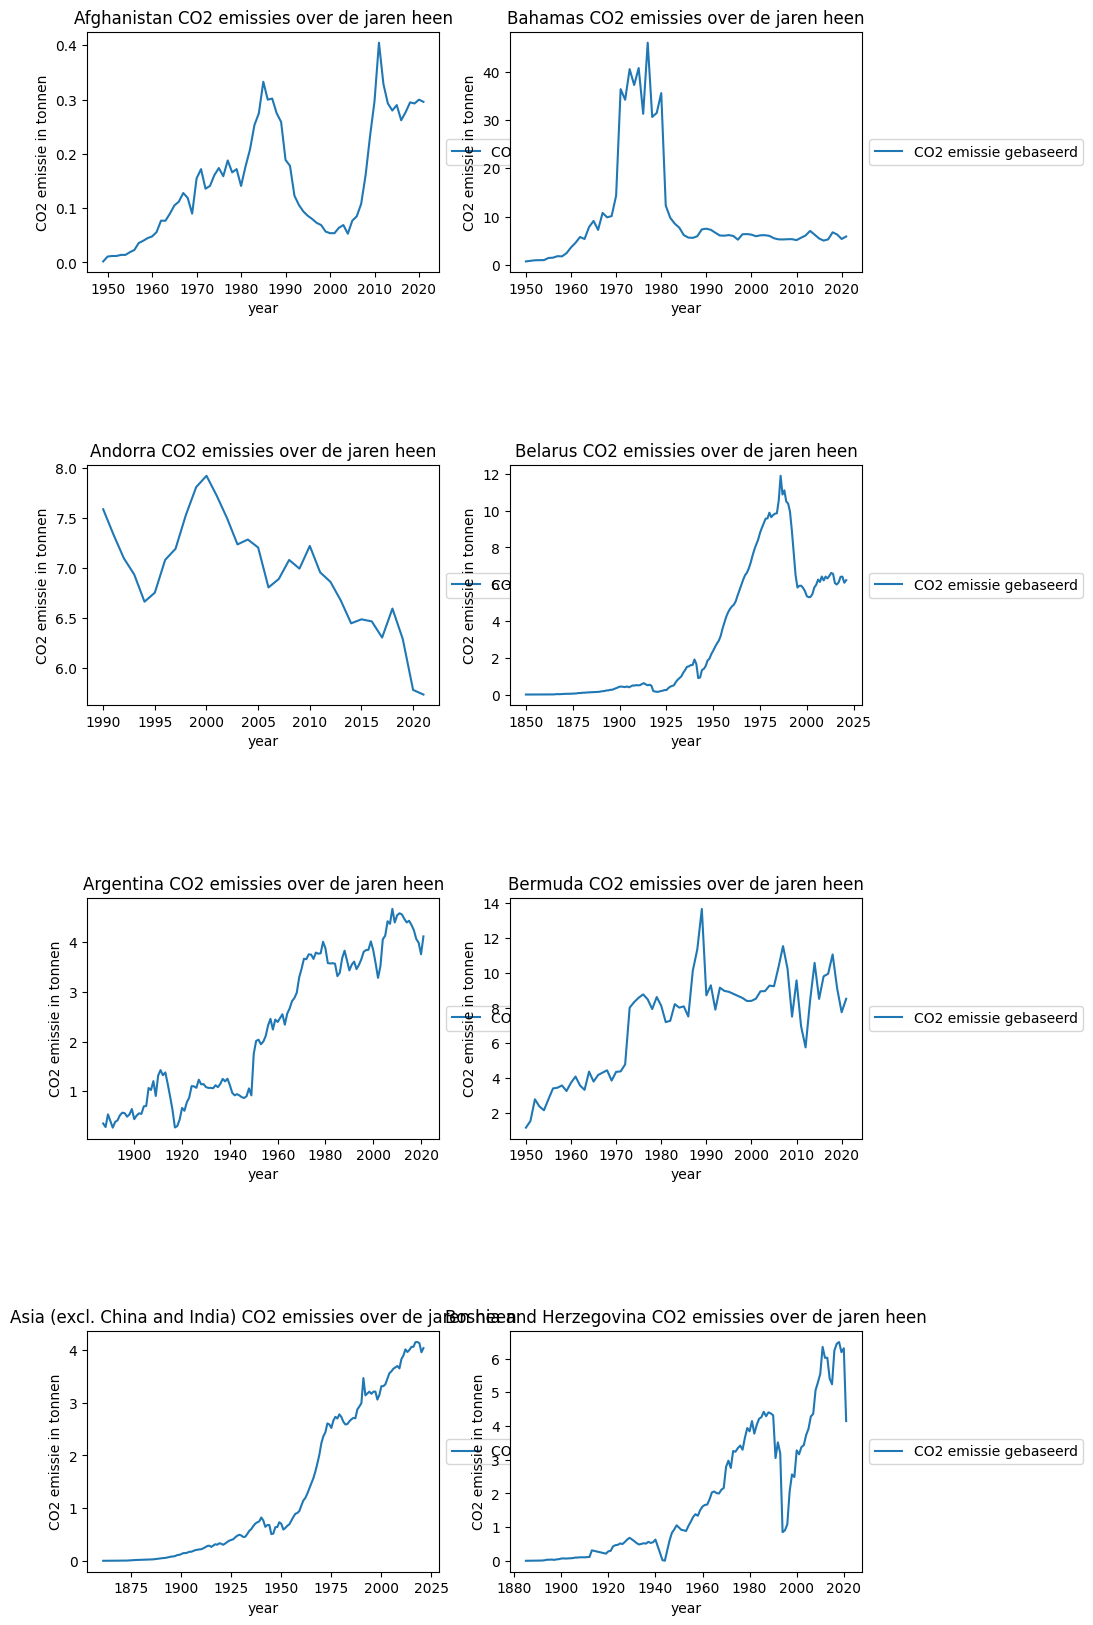

In [105]:
#We kijken naar de CO2 emissie per hoofd van de bevolking om een indruk te krijgen
#Lineplot per land co2_per_capita
fig, ax = plt.subplots(4,2)
fig.set_size_inches(10,20)
plt.subplots_adjust( hspace=.8)
i=0
j=0
z=0
for country in df_co2_small['country'].unique():
  temp = df_co2_small[df_co2_small['country'] == country]
  if z%4==0 and len(temp['year']) > 20 and i < 8:
    x = temp['year']
    y = temp['co2_per_capita']
    ax[i,j].set_xlabel('year')
    ax[i,j].set_ylabel('CO2 emissie in tonnen')
    ax[i,j].set_title(country + ' CO2 emissies over de jaren heen')
    ax[i,j].plot(x, y, label = 'CO2 emissie gebaseerd')
    ax[i,j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    i=i+1
    if i%4==0:
      j = j+1
      i = 0
      if j==2:
        break
  z=z+1

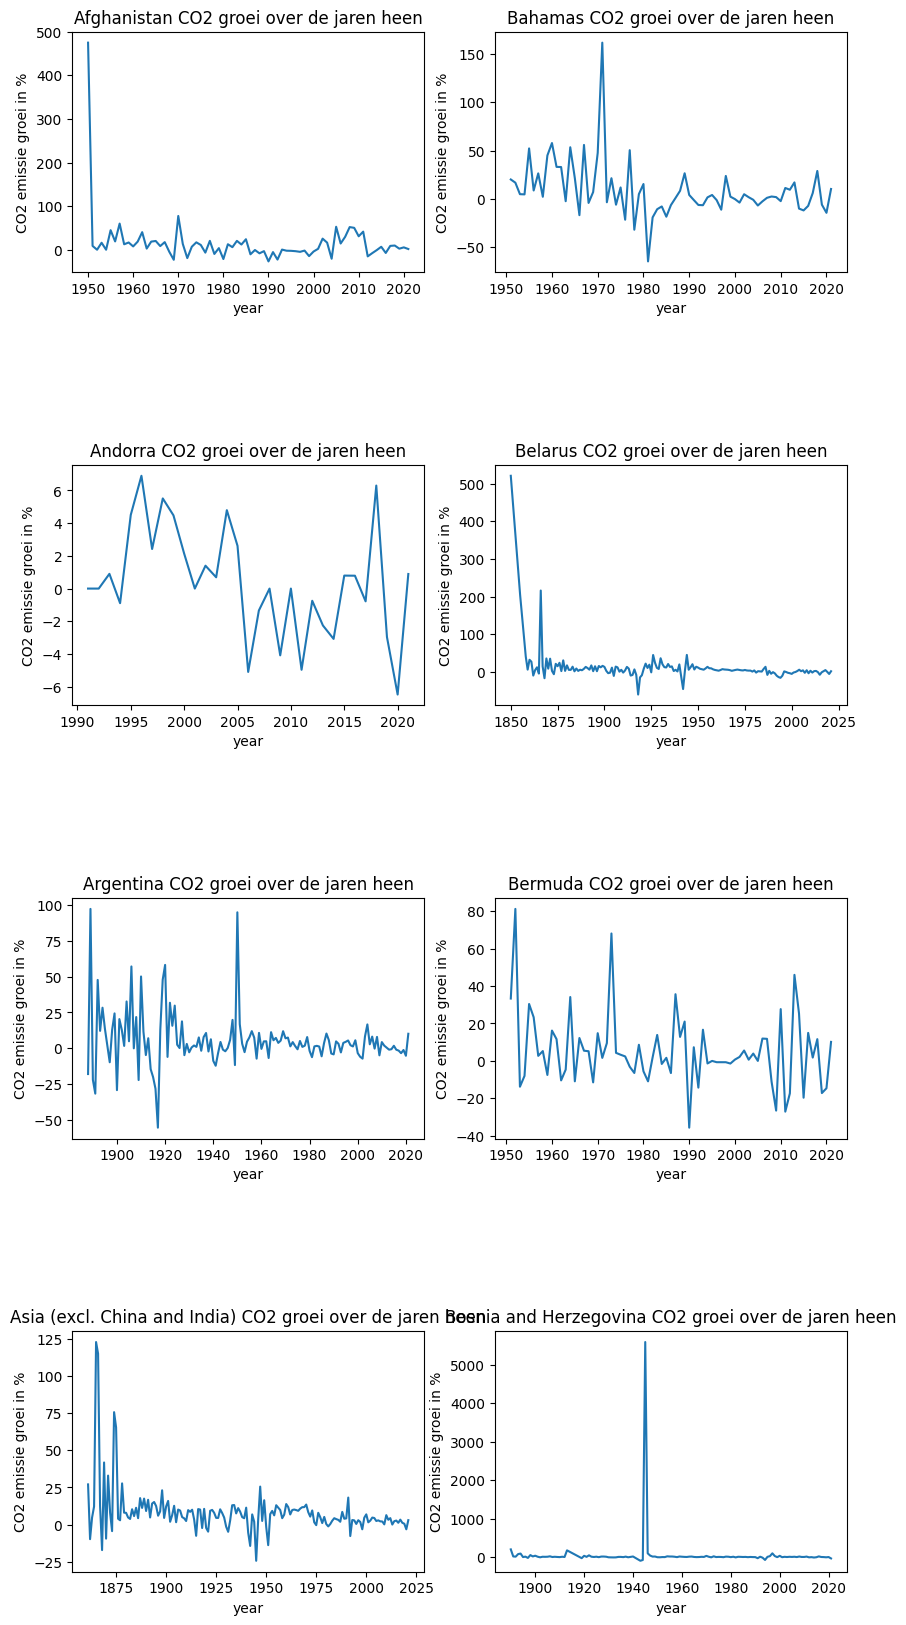

In [106]:
#We bekijken de groei/daling in CO2 emissie percentueel
#Omdat we alleen de verbeterde landen willen zien, hebben we de negatieve growht nodig
#weer even plotten voor de beeldvorming
fig, ax = plt.subplots(4,2)
fig.set_size_inches(10,20)
plt.subplots_adjust( hspace=.8)
i=0
j=0
z=0
for country in df_co2_small['country'].unique():
  temp = df_co2_small[df_co2_small['country'] == country]
  if z%4==0 and len(temp['year']) > 20 and i < 8:
    x = temp['year']
    y = temp['co2_growth_prct']
    ax[i,j].set_xlabel('year')
    ax[i,j].set_ylabel('CO2 emissie groei in %')
    ax[i,j].set_title(country + ' CO2 groei over de jaren heen')
    ax[i,j].plot(x, y)
    i=i+1
    if i%4==0:
      j = j+1
      i = 0
      if j==2:
        break
  z=z+1

In [148]:
import math
#We bepalen de landen met verbetering
#We nemen de eerste CO2 per capita en vergelijken dit met de laatst bekende waarde per land
#We doen dit ook voor de totale CO2 waarde
co2_vergelijking_df = pd.DataFrame(columns = ['country', 'first_co2_per_capita', 'last_co2_per_capita','difference_co2_per_capita','first_co2','last_co2','difference_co2'])
index = 0
for country in df_co2_small['country'].unique():
  temp = df_co2_small[df_co2_small['country']==country]
  temp = temp.sort_values(by='year')
  i=0
  co2_vergelijking_df.at[index,'country'] = country
  while True: #de eerst aanwezige data per land opvragen
    if ~(math.isnan(temp.at[temp.index[i],'co2']) | math.isnan(temp.at[temp.index[i],'co2_per_capita'])):
      co2_vergelijking_df.at[index,'first_co2_per_capita'] = temp.at[temp.index[i],'co2_per_capita']
      co2_vergelijking_df.at[index,'first_co2'] = temp.at[temp.index[i],'co2']
      break;
    i = i+1
  
  i=len(temp)-1
  while True: #de laatst aanwezige data per land opvragen
    if ~(math.isnan(temp.at[temp.index[i],'co2']) | math.isnan(temp.at[temp.index[i],'co2_per_capita'])):
      co2_vergelijking_df.at[index,'last_co2_per_capita'] = temp.at[temp.index[i],'co2_per_capita']
      co2_vergelijking_df.at[index,'difference_co2_per_capita'] =  temp.at[temp.index[i],'co2_per_capita'] - co2_vergelijking_df.at[index,'first_co2_per_capita']
      co2_vergelijking_df.at[index,'last_co2'] = temp.at[temp.index[i],'co2']
      co2_vergelijking_df.at[index,'difference_co2'] =  temp.at[temp.index[i],'co2'] - co2_vergelijking_df.at[index,'first_co2']
      break;
    i = i-1
  index = index + 1

In [152]:
co2_vergelijking_df.sort_values(by='difference_co2_per_capita',inplace=True)
df_temp = co2_vergelijking_df.head(5)
co2_vergelijking_df.sort_values(by='difference_co2',inplace=True)
df_temp1 = co2_vergelijking_df.head(5)
df_temp = pd.concat([df_temp,df_temp1] )
df_temp

,country,first_co2_per_capita,last_co2_per_capita,difference_co2_per_capita,first_co2,last_co2,difference_co2
192,Sint Maarten (Dutch part),492.573,14.705,-477.868,0.729,0.648,-0.081
52,Curacao,61.069,9.686,-51.383,6.112,1.844,-4.268
27,Bonaire Sint Eustatius and Saba,12.578,3.868,-8.71,0.088,0.103,0.015
120,Liechtenstein,6.911,3.865,-3.046,0.199,0.151,-0.048
10,Aruba,9.935,8.054,-1.881,0.135,0.858,0.723
52,Curacao,61.069,9.686,-51.383,6.112,1.844,-4.268
111,Kosovo,4.096,3.396,-0.7,7.387,5.644,-1.743
192,Sint Maarten (Dutch part),492.573,14.705,-477.868,0.729,0.648,-0.081
120,Liechtenstein,6.911,3.865,-3.046,0.199,0.151,-0.048
220,Tuvalu,1.195,0.708,-0.487,0.011,0.008,-0.003


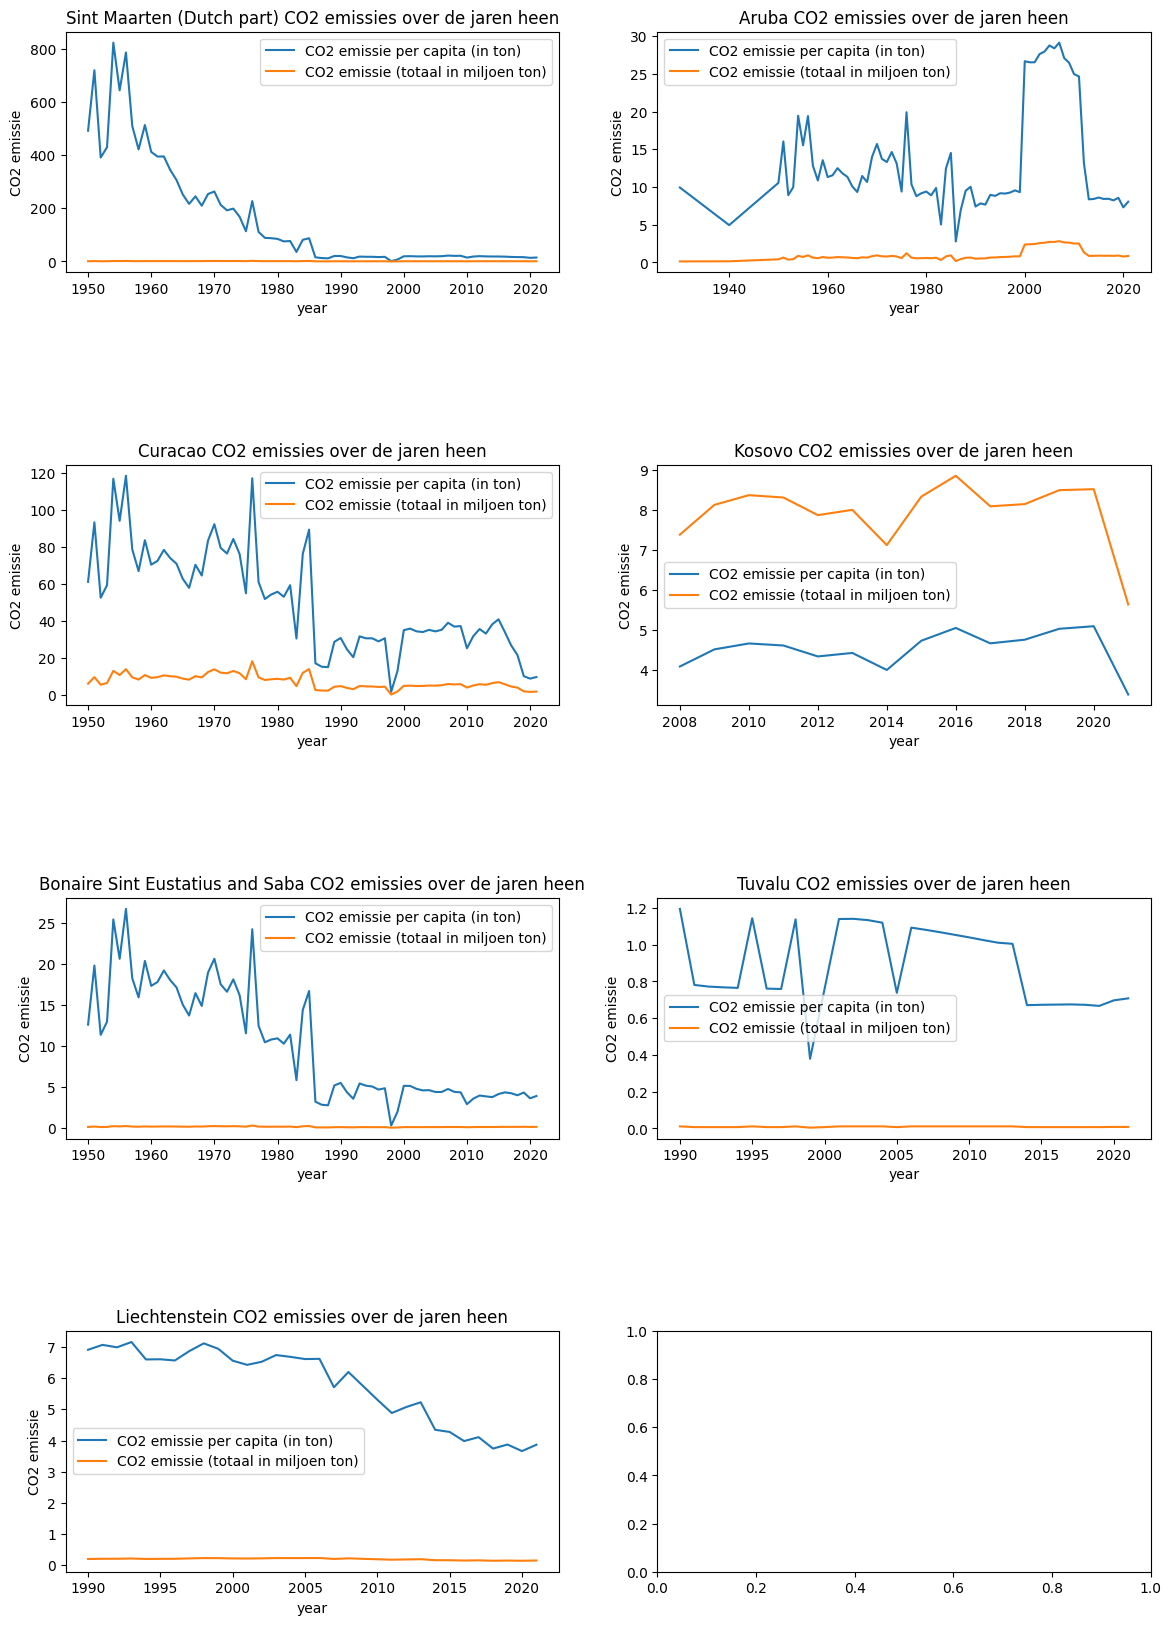

In [121]:
#We gaan deze 7 als uitgangspunt nemen voor de analyse en plotten eerst het verloop van de CO2's per land
fig, ax = plt.subplots(4,2)
fig.set_size_inches(14,20)
plt.subplots_adjust( hspace=.8)
i=0
j=0
for country in df_temp['country'].unique():
  temp = df_co2_small[df_co2_small['country'] == country]
  x = temp['year']
  y1 = temp['co2_per_capita'] #ton
  y2 = temp['co2'] #miljoen ton
  ax[i,j].set_xlabel('year')
  ax[i,j].set_ylabel('CO2 emissie')
  ax[i,j].set_title(country + ' CO2 emissies over de jaren heen')
  ax[i,j].plot(x, y1, label = 'CO2 emissie per capita (in ton)')
  ax[i,j].plot(x, y2, label = 'CO2 emissie (totaal in miljoen ton)')
  # ax[i,j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
  ax[i,j].legend()
  i=i+1
  if i%4==0:
    j = j+1
    i = 0
    if j==2:
      break

In [ ]:
temp = df_co2_small[df_co2_small['country'] == 'Sint Maarten (Dutch part)']
temp.loc[:,['co2_per_capita','co2']]

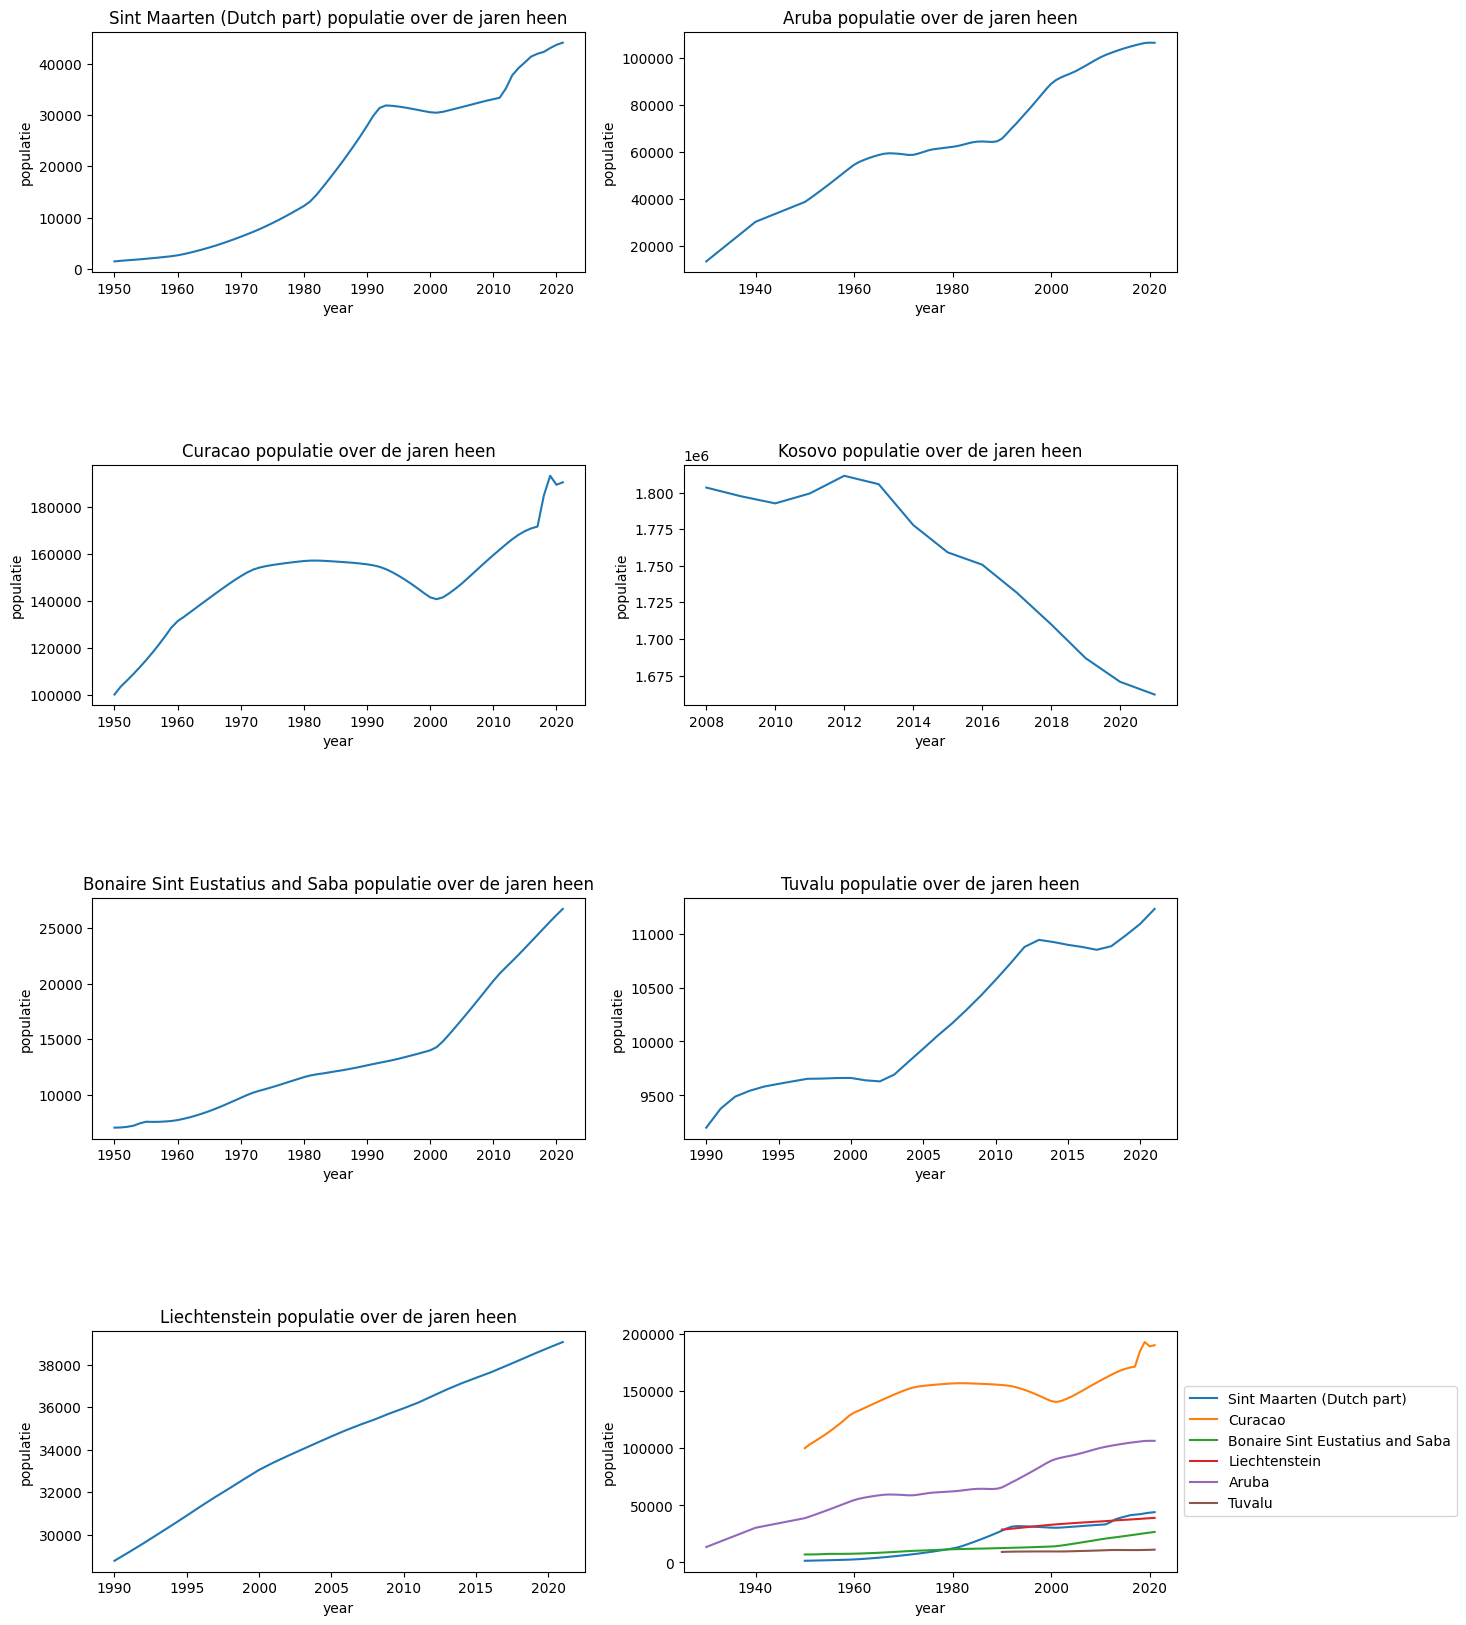

In [140]:
df_co2_small[df_co2_small['country'].isin(df_temp['country'])].loc[:,['country','year','population']]

#We plotten de populatie
fig, ax = plt.subplots(4,2)
fig.set_size_inches(14,20)
plt.subplots_adjust( hspace=.8)
i=0
j=0
for country in df_temp['country'].unique():
  temp = df_co2_small[df_co2_small['country'] == country]
  x = temp['year']
  y1 = temp['population']
  ax[i,j].set_xlabel('year')
  ax[i,j].set_ylabel('populatie')
  ax[i,j].set_title(country + ' populatie over de jaren heen')
  ax[i,j].plot(x, y1)
  if country != 'Kosovo':
    ax[3,1].plot(x, y1, label = country)
    ax[3,1].set_xlabel('year')
    ax[3,1].set_ylabel('populatie')
    ax[3,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
  i=i+1
  if i%4==0:
    j = j+1
    i = 0
    if j==2:
      break

In [141]:
import math
#We bepalen de start en eind populatie
co2_vergelijking_df = pd.DataFrame(columns = ['country', 'first_population', 'last_population','difference'])
index = 0
for country in df_co2_small['country'].unique():
  temp = df_co2_small[df_co2_small['country']==country]
  temp = temp.sort_values(by='year')
  i=0
  co2_vergelijking_df.at[index,'country'] = country
  while True: #de eerst aanwezige data per land opvragen
    if ~(math.isnan(temp.at[temp.index[i],'co2']) | math.isnan(temp.at[temp.index[i],'co2_per_capita'])):
      co2_vergelijking_df.at[index,'first_population'] = temp.at[temp.index[i],'population']
      break;
    i = i+1
  
  i=len(temp)-1
  while True: #de laatst aanwezige data per land opvragen
    if ~(math.isnan(temp.at[temp.index[i],'co2']) | math.isnan(temp.at[temp.index[i],'co2_per_capita'])):
      co2_vergelijking_df.at[index,'last_population'] = temp.at[temp.index[i],'population']
      co2_vergelijking_df.at[index,'difference'] =  temp.at[temp.index[i],'population'] - co2_vergelijking_df.at[index,'first_population']
      break;
    i = i-1
  index = index + 1

In [145]:
co2_vergelijking_df[co2_vergelijking_df['country'].isin(df_temp['country'])].sort_values(by='difference')

,country,first_population,last_population,difference
111,Kosovo,1803379.0,1662022.0,-141357.0
220,Tuvalu,9201.0,11229.0,2028.0
120,Liechtenstein,28789.0,39058.0,10269.0
27,Bonaire Sint Eustatius and Saba,7016.0,26730.0,19714.0
192,Sint Maarten (Dutch part),1480.0,44061.0,42581.0
52,Curacao,100086.0,190348.0,90262.0
10,Aruba,13545.0,106543.0,92998.0


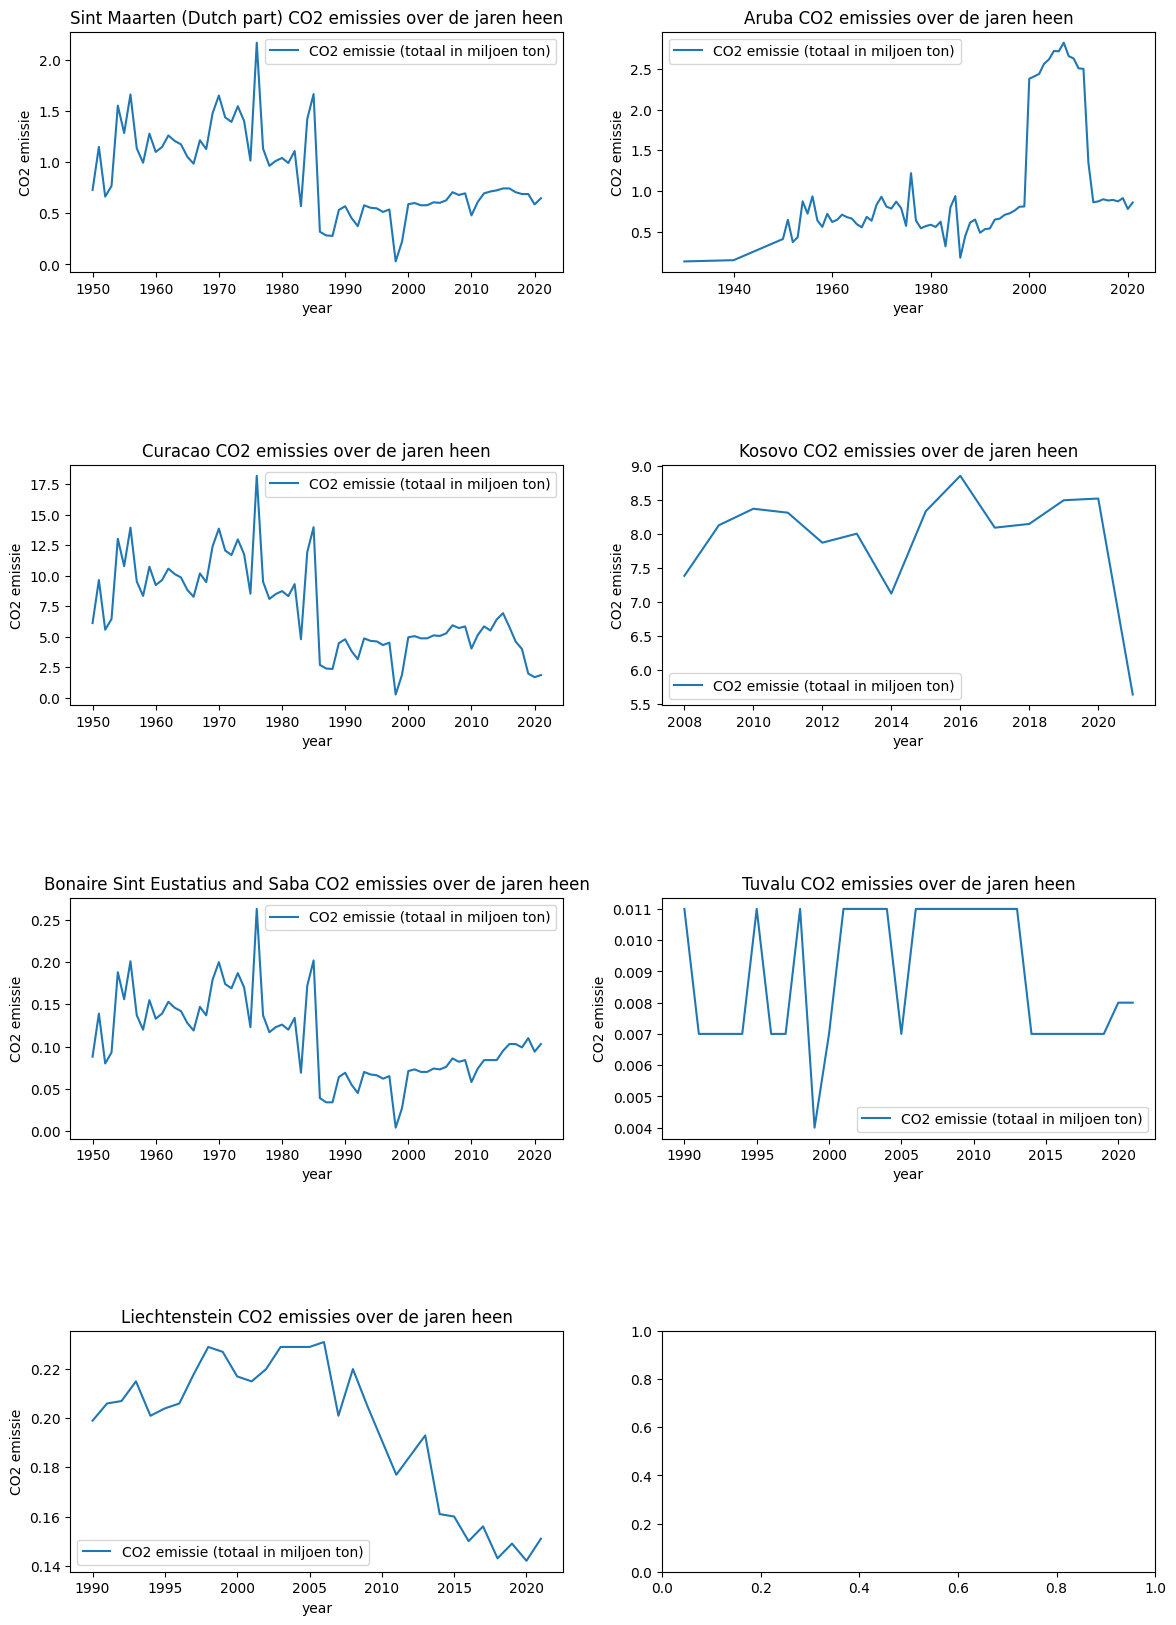

In [146]:
#We gaan deze 7 als uitgangspunt nemen voor de analyse en plotten eerst het verloop van de CO2's per land
fig, ax = plt.subplots(4,2)
fig.set_size_inches(14,20)
plt.subplots_adjust( hspace=.8)
i=0
j=0
for country in df_temp['country'].unique():
  temp = df_co2_small[df_co2_small['country'] == country]
  x = temp['year']
  y2 = temp['co2'] #miljoen ton
  ax[i,j].set_xlabel('year')
  ax[i,j].set_ylabel('CO2 emissie')
  ax[i,j].set_title(country + ' CO2 emissies over de jaren heen')
  ax[i,j].plot(x, y2, label = 'CO2 emissie (totaal in miljoen ton)')
  ax[i,j].legend()
  i=i+1
  if i%4==0:
    j = j+1
    i = 0
    if j==2:
      break

In [153]:
df_co2_small[df_co2_small['country'] == 'Kosovo']

,country,year,population,gdp,cement_co2_per_capita,co2,co2_growth_prct,co2_per_capita,coal_co2_per_capita,consumption_co2_per_capita,energy_per_capita,flaring_co2,flaring_co2_per_capita,gas_co2_per_capita,methane_per_capita,nitrous_oxide_per_capita,oil_co2_per_capita
22511,Kosovo,2008,1803379.0,NaN,0.128,7.387,NaN,4.096,3.058,NaN,13555.565,0.0,0.0,0.0,NaN,NaN,0.910
22512,Kosovo,2009,1797465.0,NaN,0.108,8.130,10.069,4.523,3.484,NaN,15299.225,0.0,0.0,0.0,NaN,NaN,0.932
22513,Kosovo,2010,1792559.0,NaN,0.090,8.372,2.974,4.671,3.689,NaN,15206.661,0.0,0.0,0.0,NaN,NaN,0.891
22514,Kosovo,2011,1799340.0,NaN,0.090,8.314,-0.700,4.620,3.561,NaN,15233.553,0.0,0.0,0.0,NaN,NaN,0.969
22515,Kosovo,2012,1811418.0,NaN,0.113,7.874,-5.289,4.347,3.338,NaN,15055.625,0.0,0.0,0.0,NaN,NaN,0.896
22516,Kosovo,2013,1805676.0,NaN,0.120,8.006,1.675,4.434,3.403,NaN,14451.603,0.0,0.0,0.0,NaN,NaN,0.911
22517,Kosovo,2014,1777812.0,NaN,0.105,7.126,-10.984,4.009,3.011,NaN,13598.529,0.0,0.0,0.0,NaN,NaN,0.892
22518,Kosovo,2015,1759122.0,NaN,0.131,8.336,16.967,4.739,3.497,NaN,15722.203,0.0,0.0,0.0,NaN,NaN,1.110
22519,Kosovo,2016,1750724.0,NaN,0.159,8.856,6.242,5.058,3.807,NaN,16397.021,0.0,0.0,0.0,NaN,NaN,1.092
22520,Kosovo,2017,1731670.0,NaN,0.188,8.094,-8.606,4.674,3.235,NaN,14844.352,0.0,0.0,0.0,NaN,NaN,1.250
